In [17]:
import sys,os
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.sequential import ConditionalSPRT
import scipy.stats as scp
import seaborn as sns

In [3]:
df = pd.read_csv("../data/AdSmartABdata.csv")

In [4]:
df.head(3)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1


In [5]:
df.groupby("experiment")

In [6]:
def transform_data(df):
    '''
    segment data into exposed and control groups
    consider that SmartAd runs the experment hourly, group data into hours. 
    Hint: create new column to hold date+hour and use df.column.map(lambda x:  pd.Timestamp(x,tz=None).strftime('%Y-%m-%d:%H'))
    create two dataframes with bernouli series 1 for posetive(yes) and 0 for negative(no)
    Hint: Given engagement(sum of yes and no until current observation as an array) and success (yes countas an array), the method generates random binomial distribution
    #Example
       engagement = np.array([5, 3, 3])
       yes = np.array([2, 0, 3])       
     Output is "[1] 1 0 1 0 0 0 0 0 1 1 1", showing a binary array of 5+3+3 values
     of which 2 of the first 5 are ones, 0 of the next 3 are ones, and all 3 of
     the last 3 are ones where position the ones is randomly distributed within each group.
    '''
    df['hour'] = df.hour.astype(str)
    hours = []
    for i in df['hour']:
        if len(i) < 2:
            hours.append(i.zfill(2))
        else:
            hours.append(i)
    df['hour'] = hours
    df['hour'] = df.hour.astype(str)
    df['date_hour'] =  pd.to_datetime(df['date'] + ' ' + df['hour'] + ':00:00')
    a, b = 0.2, 0.8
    yes = scp.bernoulli .rvs(a, b, size = len(df)) 
    df['bern_yes'] = yes
    a, b = 0.2, 0.8
    no = scp.bernoulli .rvs(a, b, size = len(df)) 
    df['bern_no'] = no
    
    return df

In [7]:
exposed = df[df['experiment']=='exposed']
control = df[df['experiment']=='control']


In [8]:
# from scripts.sequential import ConditionalSPRT
csprt = ConditionalSPRT(exposed['yes'].to_numpy(),control['yes'].to_numpy(),0.064)
results = csprt.ConditionalSPRT(300,exposed['yes'].to_numpy(),control['yes'].to_numpy(),2,1)

In [9]:
results

('Their is no statistically significant difference between two test groups',
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164,

In [13]:
outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits=results

In [30]:
x = ["l","u"]
y = [l,u]

In [31]:
y = [float(i) for i in y]

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

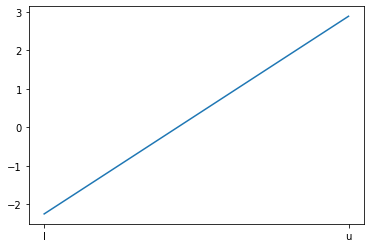

In [33]:

sns.lineplot(x,y)